In [9]:
import pandas as pd 
import numpy as np
%pylab inline
matplotlib.rcParams['figure.figsize'] = [16, 8]
plt.rcParams.update({'font.size': 15})

AgentType1 = ["poorLow", "richLow"]
AgentType2 = ["poorHigh", "richHigh"]
AgentType = ["poorHigh","poorLow","richHigh","richLow"]

Beta_r = [0.06]
Gamma = [4.0]

Populating the interactive namespace from numpy and matplotlib


/home/dli36/anaconda3/lib/python3.8/site-packages/IPython/core/magics/pylab.py:159: UserWarning: pylab import has clobbered these variables: ['gamma']
`%matplotlib` prevents importing * from pylab and numpy
  warn("pylab import has clobbered these variables: %s"  % clobbered +


In [10]:
# get the empirical part ready
Fdf = pd.read_csv("familyData.csv")
codes = {'employed':1, 'unemployed': 0, "retired": 0}
Fdf["employmentStatus"] = Fdf["employmentStatus"].map(codes)
codes = {'owner':1, 'renter': 0}
Fdf["ownership"] = Fdf["ownership"].map(codes)

years = [1999, 2001, 2003, 2005, 2007, 2009, 2011, 2013, 2015, 2017, 2019]
def outputVariables2(waseozcbkhmType):
    output = []
    for i in range(waseozcbkhmType[0].shape[0]):
        output.append(np.concatenate((waseozcbkhmType[0][i],waseozcbkhmType[1][i]), axis = 1))
    return output

def outputVariables(waseozcbkhmType):
    output = []
    for i in range(waseozcbkhmType[0].shape[0]):
        output.append(np.concatenate((waseozcbkhmType[0][i],waseozcbkhmType[1][i],waseozcbkhmType[2][i],waseozcbkhmType[3][i]), axis = 1))
    return output

In [19]:
np.load("meanInvestment4agents.npy")

array(0.232, dtype=float32)

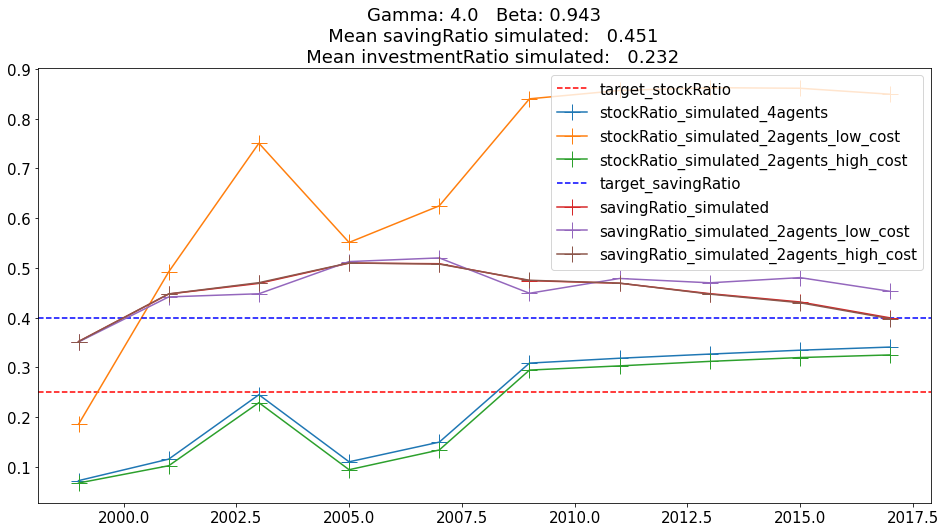

In [22]:
for gamma in Gamma:
    for beta_r in Beta_r:
        waseozcbkhmType = []
        for agentType in AgentType:
            ### load in the data 
            fileName = agentType + "_" + str(beta_r) + "_" + str(gamma)
            waseozcbkhmType.append(np.load("../20220215/waseozcbkhm_" + fileName + ".npy", allow_pickle=True))
        waseozcbkhm = outputVariables(waseozcbkhmType)
        # [ws,ab,ss,es,os,zs,cs,bs,ks,hs,ms]
        wwww, aaaa, ssss, eeee, oooo, zzzz, cccc, bbbb, kkkk, hhhh, mmmm = waseozcbkhm
        # generate comparison plots between empirical and simulated variables
        plt.figure()
        stockRatio_empirical = []
        savingRatio_empirical = []
        stockRatio_simulated = []
        savingRatio_simulated = []
        for year in years[:-1]:  
            df = Fdf[(Fdf['year'] == year) & (Fdf['ageHead'] >= 30+(year-1999)) & (Fdf['ageHead'] <= 60 + (year - 1999))]
            stockRatio_empirical.append((df.investmentAmount / (df.liquidWealth + df.investmentAmount)).mean())
            savingRatio_empirical.append(((df.liquidWealth + df.investmentAmount)/(df.totalExpense + df.liquidWealth + df.investmentAmount)).mean())
            w = wwww[year - years[0],:]
            b = bbbb[year - years[0],:]
            k = kkkk[year - years[0],:]
            c = cccc[year - years[0],:]
            o = oooo[year - years[0],:]
            stockRatio_simulated.append((k/(b+k)).mean())
            savingRatio_simulated.append(((b+k)/((c+c*(3/7)*o)+b+k)).mean())
        meanSaving_empirical = round(np.mean(savingRatio_empirical), 3)
        meanInvestment_empirical = round(np.mean(stockRatio_empirical), 3)
        meanSaving_simulated = round(np.mean(savingRatio_simulated), 3)
        np.save("meanSaving4agents", savingRatio_simulated)
        np.save("meanInvestment4agents", stockRatio_simulated)
        meanInvestment_simulated = round(np.mean(stockRatio_simulated), 3)
        plt.title("Gamma: " + str(gamma) +  "   Beta: " + str(round(1/(1+beta_r),3)) + 
                  "\n   Mean savingRatio simulated:   " + str(meanSaving_simulated) +
                  "\n   Mean investmentRatio simulated:   " + str(meanInvestment_simulated) 
                 )
        # plt.plot(years[:-1], stockRatio_empirical, 'ro-', label = "stockRatio_empirical", markersize = 16)
        plt.axhline(y=0.25, color='r', linestyle='--', label = "target_stockRatio")
        plt.plot(years[:-1], np.load("meanInvestment4agents.npy"), '+-', label = "stockRatio_simulated_4agents", markersize = 16)
        plt.plot(years[:-1], np.load("meanInvestment2agentsLowCost.npy"), '+-', label = "stockRatio_simulated_2agents_low_cost", markersize = 16)
        plt.plot(years[:-1], np.load("meanInvestment2agentsHighCost.npy"), '+-', label = "stockRatio_simulated_2agents_high_cost", markersize = 16)

        # plt.plot(years[:-1], savingRatio_empirical, 'bo-', label = "savingRatio_empirical", markersize = 16)
        plt.axhline(y=0.40, color='b', linestyle='--', label = "target_savingRatio")
        plt.plot(years[:-1], np.load("meanSaving4agents.npy"), '+-', label = "savingRatio_simulated", markersize = 16)
        plt.plot(years[:-1], np.load("meanSaving2agentsLowCost.npy"), '+-', label = "savingRatio_simulated_2agents_low_cost", markersize = 16)
        plt.plot(years[:-1], np.load("meanSaving2agentsHighCost.npy"), '+-', label = "savingRatio_simulated_2agents_high_cost", markersize = 16)
        plt.legend()

In [27]:
wealthLevel = []
consumption = []
investmentStock = []
bondOrcash = []
annuityAmount = []
participation = []
ownershipStatus = []
employment = []

for year in years:
    wealthLevel.append(Fdf[(Fdf['year'] == year) & (Fdf['ageHead'] >= 30+(year-1999)) & (Fdf['ageHead'] <= 60 + (year - 1999))]["wealthWithoutHomeEquity"].values)
    investmentStock.append(Fdf[(Fdf['year'] == year) & (Fdf['ageHead'] >= 30+(year-1999)) & (Fdf['ageHead'] <= 60 + (year - 1999))]["investmentAmount"].values)
    consumption.append(Fdf[(Fdf['year'] == year) & (Fdf['ageHead'] >= 30+(year-1999)) & (Fdf['ageHead'] <= 60 + (year - 1999))]["totalExpense"].values)
    bondOrcash.append(Fdf[(Fdf['year'] == year) & (Fdf['ageHead'] >= 30+(year-1999)) & (Fdf['ageHead'] <= 60 + (year - 1999))]["liquidWealth"].values)
    annuityAmount.append(Fdf[(Fdf['year'] == year) & (Fdf['ageHead'] >= 30+(year-1999)) & (Fdf['ageHead'] <= 60 + (year - 1999))]["annuityIRA"].values)
    participation.append(Fdf[(Fdf['year'] == year) & (Fdf['ageHead'] >= 30+(year-1999)) & (Fdf['ageHead'] <= 60 + (year - 1999))]["participation"].mean())
    ownershipStatus.append(Fdf[(Fdf['year'] == year) & (Fdf['ageHead'] >= 30+(year-1999)) & (Fdf['ageHead'] <= 60 + (year - 1999))]["ownership"].mean())
    employment.append(Fdf[(Fdf['year'] == year) & (Fdf['ageHead'] >= 30+(year-1999)) & (Fdf['ageHead'] <= 60 + (year - 1999))]["employmentStatus"].mean())

In [36]:
def tsplot(x, y, lab, n=2, percentile_min=25, percentile_max=75, color='r', plot_mean=False, plot_median=True, line_color='k'):
    # calculate the lower and upper percentile groups, skipping 50 percentile
    perc1 = []
    perc2 = []
    meanValue = []
    medianValue = []
    for i in range(len(y)):
        perc1.append(np.percentile(y[i], np.linspace(percentile_min, 50, num=n, endpoint=False), axis=0))
        perc2.append(np.percentile(y[i], np.linspace(50, percentile_max, num=n+1)[1:], axis=0))
        meanValue.append(np.mean(y[i]))
        medianValue.append(np.median(y[i]))
    perc1 = np.array(perc1).T
    perc2 = np.array(perc2).T
    alpha = 1/n
    # # fill lower and upper percentile groups
    # for p1, p2 in zip(perc1, perc2):
    #     plt.fill_between(x, p1, p2, alpha=alpha, color=color, edgecolor=None)


    if plot_mean:
        plt.plot(x, meanValue, color=line_color,label = lab)


    # if plot_median:
    #     plt.plot(x, medianValue, color=line_color,label = lab)
    
    return plt.gca()

<ipython-input-37-531b976951bd>:15: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  tsplot(years,(np.array(investmentStock) + np.array(bondOrcash)),"liquidWealth_empirical",color="b", line_color="b", percentile_min=25, percentile_max=75,plot_mean=True)


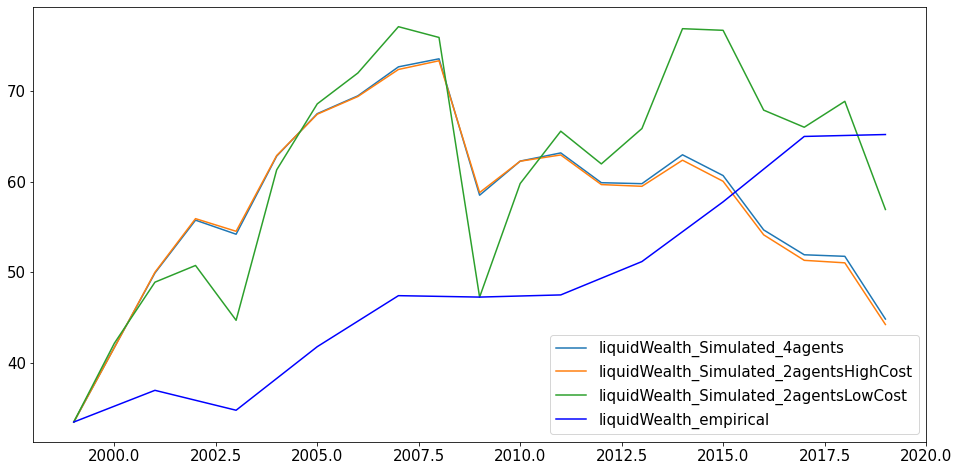

In [37]:
for gamma in Gamma:
    for beta_r in Beta_r:
        waseozcbkhmType = []
        for agentType in AgentType1:
            ### load in the data 
            fileName = agentType + "_" + str(beta_r) + "_" + str(gamma)
            waseozcbkhmType.append(np.load("../20220229/waseozcbkhm_" + fileName + ".npy", allow_pickle=True))
        waseozcbkhm = outputVariables2(waseozcbkhmType)
        # [ws,ab,ss,es,os,zs,cs,bs,ks,hs,ms]
        wwww, aaaa, ssss, eeee, oooo, zzzz, cccc, bbbb, kkkk, hhhh, mmmm = waseozcbkhm
        Label = "liquidWealth_Simulated_" + str(round(1/(1+beta_r), 2)) + "_" + str(gamma)
        plt.plot(range(1999,2020), np.load("liquidWealth_Simulated_4agents.npy"), label = "liquidWealth_Simulated_4agents")
        plt.plot(range(1999,2020), np.load("liquidWealth_Simulated_2agentsHighCost.npy"), label = "liquidWealth_Simulated_2agentsHighCost")
        plt.plot(range(1999,2020), np.load("liquidWealth_Simulated_2agentsLowCost.npy"), label = "liquidWealth_Simulated_2agentsLowCost")
tsplot(years,(np.array(investmentStock) + np.array(bondOrcash)),"liquidWealth_empirical",color="b", line_color="b", percentile_min=25, percentile_max=75,plot_mean=True)
plt.legend()

In [38]:
import jax.numpy as jnp
T_max = 60
T_min = 0
# variable associated with housing and mortgage 
# age limit of buying a house
ageLimit = 30
mortgageLength = 30
# mortgage rate 
rh = 0.045
# housing unit
H = 1000
# max rent unit
Rl = 500
# housing price constant 
pt = 2*250/1000
# 30k rent 1000 sf
pr = 2*10/1000 * 2 
# constant cost 
c_h = 5
c_s = H*pt*0.4
# Dm is used to update the mortgage payment
Dm = [(1+rh) - rh*(1+rh)**(T_max - t)/((1+rh)**(T_max-t)-1) for t in range(T_min, T_max)]
Dm[-1] = 0
Dm = jnp.array(Dm)
# 30 year mortgage
Ms = []
M = H*pt*0.8
m = M*(1+rh) - Dm[30]*M
for i in range(30, T_max):
    Ms.append(M)
    M = M*(1+rh) - m
Ms.append(0)
Ms = jnp.array(Ms)
pr = 2*10/1000 * 2 


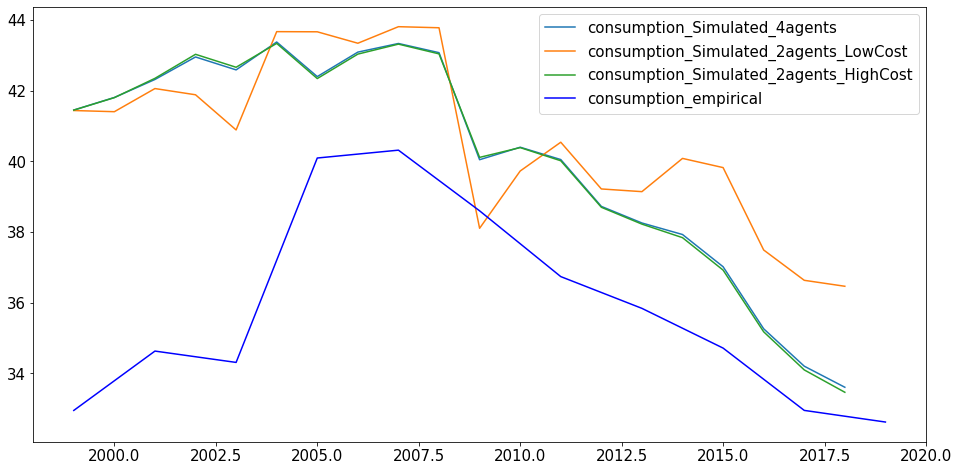

In [46]:
for gamma in Gamma:
    for beta_r in Beta_r:
        waseozcbkhmType = []
        for agentType in AgentType1:
            ### load in the data 
            fileName = agentType + "_" + str(beta_r) + "_" + str(gamma)
            waseozcbkhmType.append(np.load("../20220229/waseozcbkhm_" + fileName + ".npy", allow_pickle=True))
        waseozcbkhm = outputVariables2(waseozcbkhmType)
        # [ws,ab,ss,es,os,zs,cs,bs,ks,hs,ms]
        wwww, aaaa, ssss, eeee, oooo, zzzz, cccc, bbbb, kkkk, hhhh, mmmm = waseozcbkhm
        Label = "consumption_Simulated_" + str(round(1/(1+beta_r), 2)) + "_" + str(gamma)
        plt.plot(range(1999,2019), np.load("consumption_Simulated_4agents.npy"), label = "consumption_Simulated_4agents")
        plt.plot(range(1999,2019), np.load("consumption_Simulated_2agents_LowCost.npy"), label = "consumption_Simulated_2agents_LowCost")
        plt.plot(range(1999,2019), np.load("consumption_Simulated_2agents_HighCost.npy"), label = "consumption_Simulated_2agents_HighCost")
tsplot(years,consumption, "consumption_empirical",color="b", line_color="b",plot_mean=True)
plt.legend()

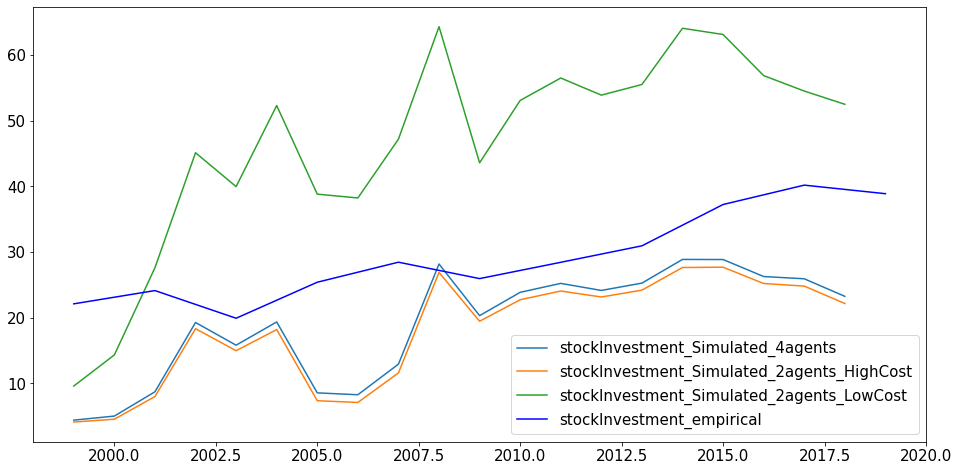

In [54]:
for gamma in Gamma:
    for beta_r in Beta_r:
        waseozcbkhmType = []
        for agentType in AgentType1:
            ### load in the data 
            fileName = agentType + "_" + str(beta_r) + "_" + str(gamma)
            waseozcbkhmType.append(np.load("../20220229/waseozcbkhm_" + fileName + ".npy", allow_pickle=True))
        waseozcbkhm = outputVariables2(waseozcbkhmType)
        # [ws,ab,ss,es,os,zs,cs,bs,ks,hs,ms]
        wwww, aaaa, ssss, eeee, oooo, zzzz, cccc, bbbb, kkkk, hhhh, mmmm = waseozcbkhm
        Label = "stockInvestment_Simulated_" + str(round(1/(1+beta_r), 2)) + "_" + str(gamma)
        plt.plot(range(1999,2019), np.load("stockInvestment_Simulated_4agents.npy"), label = "stockInvestment_Simulated_4agents")
        plt.plot(range(1999,2019), np.load("stockInvestment_Simulated_2agents_HighCost.npy"), label = "stockInvestment_Simulated_2agents_HighCost")
        plt.plot(range(1999,2019), np.load("stockInvestment_Simulated_2agents_LowCost.npy"), label = "stockInvestment_Simulated_2agents_LowCost")
tsplot(years,investmentStock,"stockInvestment_empirical",color="b", line_color="b",plot_mean=True)
plt.legend()

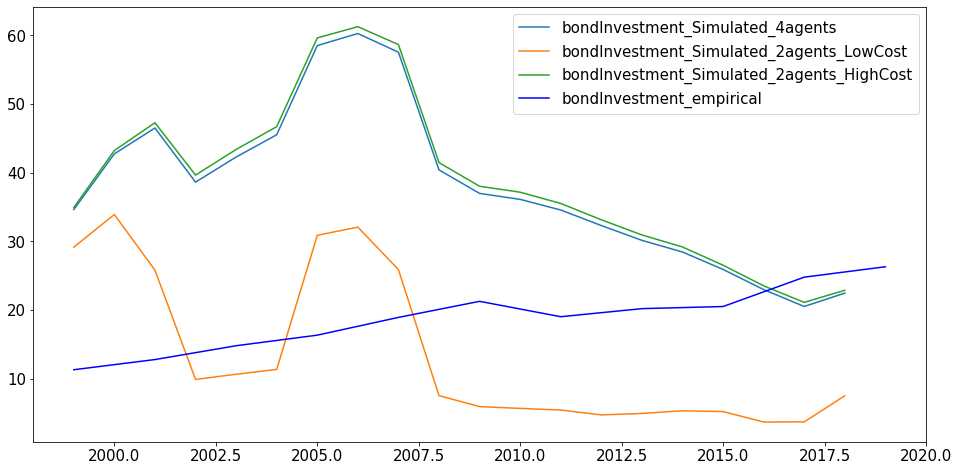

In [59]:
for gamma in Gamma:
    for beta_r in Beta_r:
        waseozcbkhmType = []
        for agentType in AgentType1:
            ### load in the data 
            fileName = agentType + "_" + str(beta_r) + "_" + str(gamma)
            waseozcbkhmType.append(np.load("../20220229/waseozcbkhm_" + fileName + ".npy", allow_pickle=True))
        waseozcbkhm = outputVariables2(waseozcbkhmType)
        # [ws,ab,ss,es,os,zs,cs,bs,ks,hs,ms]
        wwww, aaaa, ssss, eeee, oooo, zzzz, cccc, bbbb, kkkk, hhhh, mmmm = waseozcbkhm
        Label = "bondInvestment_Simulated_" + str(round(1/(1+beta_r), 2)) + "_" + str(gamma)
        plt.plot(range(1999,2019), np.load("bondInvestment_Simulated_4agents.npy"), label = "bondInvestment_Simulated_4agents")
        plt.plot(range(1999,2019), np.load("bondInvestment_Simulated_2agents_LowCost.npy"), label = "bondInvestment_Simulated_2agents_LowCost")
        plt.plot(range(1999,2019), np.load("bondInvestment_Simulated_2agents_HighCost.npy"), label = "bondInvestment_Simulated_2agents_HighCost")

        np.save("bondInvestment_Simulated_2agents_LowCost", bbbb.mean(axis = 1))       
tsplot(years,bondOrcash,"bondInvestment_empirical", color="b", line_color="b",plot_mean=True)
plt.legend()

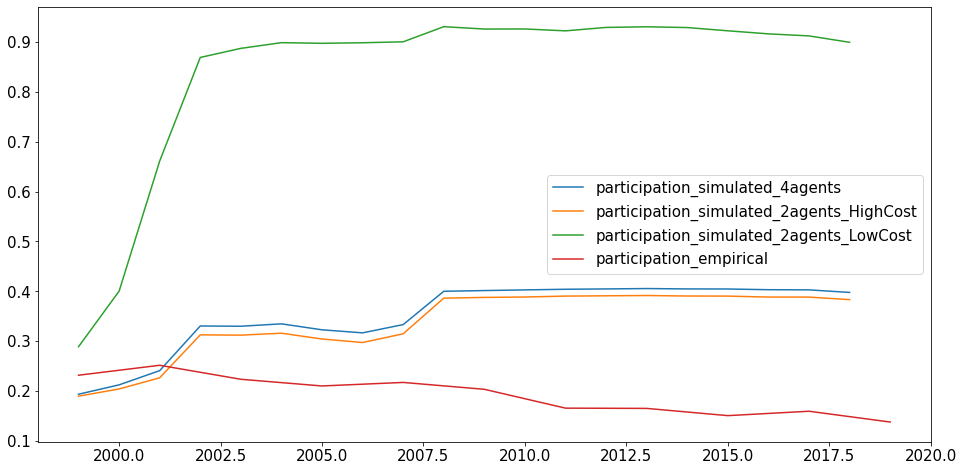

In [64]:
for gamma in Gamma:
    for beta_r in Beta_r:
        waseozcbkhmType = []
        for agentType in AgentType1:
            ### load in the data 
            fileName = agentType + "_" + str(beta_r) + "_" + str(gamma)
            waseozcbkhmType.append(np.load("../20220229/waseozcbkhm_" + fileName + ".npy", allow_pickle=True))
        waseozcbkhm = outputVariables2(waseozcbkhmType)
        # [ws,ab,ss,es,os,zs,cs,bs,ks,hs,ms]
        wwww, aaaa, ssss, eeee, oooo, zzzz, cccc, bbbb, kkkk, hhhh, mmmm = waseozcbkhm
        plt.plot(range(1999,2019), np.load("participation_simulated_4agents.npy"), label = "participation_simulated_4agents")
        plt.plot(range(1999,2019), np.load("participation_simulated_2agents_HighCost.npy"), label = "participation_simulated_2agents_HighCost")
        plt.plot(range(1999,2019), np.load("participation_simulated_2agents_LowCost.npy"), label = "participation_simulated_2agents_LowCost")

plt.plot(years,participation, label = "participation_empirical")
plt.legend()

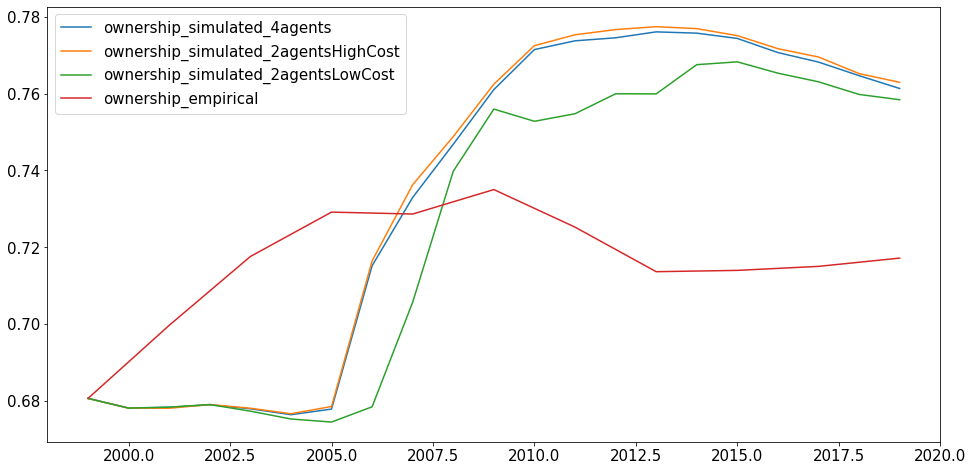

In [69]:
for gamma in Gamma:
    for beta_r in Beta_r:
        waseozcbkhmType = []
        for agentType in AgentType1:
            ### load in the data 
            fileName = agentType + "_" + str(beta_r) + "_" + str(gamma)
            waseozcbkhmType.append(np.load("../20220229/waseozcbkhm_" + fileName + ".npy", allow_pickle=True))
        waseozcbkhm = outputVariables2(waseozcbkhmType)
        # [ws,ab,ss,es,os,zs,cs,bs,ks,hs,ms]
        wwww, aaaa, ssss, eeee, oooo, zzzz, cccc, bbbb, kkkk, hhhh, mmmm = waseozcbkhm
        plt.plot(range(1999,2020), np.load("ownership_simulated_4agents.npy"), label = "ownership_simulated_4agents")
        plt.plot(range(1999,2020), np.load("ownership_simulated_2agentsHighCost.npy"), label = "ownership_simulated_2agentsHighCost")
        plt.plot(range(1999,2020), np.load("ownership_simulated_2agentsLowCost.npy"), label = "ownership_simulated_2agentsLowCost")
plt.plot(years,ownershipStatus, label = "ownership_empirical")
plt.legend()